<a href="https://colab.research.google.com/github/irenechau31/PYTHON/blob/main/Compare_performance_using_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
hitters2018=pd.read_excel('hitters.xlsx', '2018')
hitters2019=pd.read_excel('hitters.xlsx', '2019')

In [22]:
hitters2018.head()

,RK,NAME,POS,GP,AB,R,H,AVG,2B,3B,HR,RBI,BB,K,SB,OBP,SLG,OPS,WAR
0,1,Mookie Betts,RF,136,520,129,180,0.346,47,5,32,80,81,91,30,0.438,0.640,1.078,10.9
1,2,J.D. Martinez,DH,150,569,111,188,0.330,37,2,43,130,69,146,6,0.402,0.629,1.031,6.4
2,3,Christian Yelich,LF,147,574,118,187,0.326,34,7,36,110,68,135,22,0.402,0.598,1.000,7.6
3,4,Jose Altuve,2B,137,534,84,169,0.316,29,2,13,61,55,79,17,0.386,0.451,0.837,5.2
4,5,Mike TroutL,CF,140,471,101,147,0.312,24,4,39,79,122,124,24,0.460,0.628,1.088,10.2


In [23]:
hitters2019.head()

,RK,NAME,AB,H
0,1,Tim Anderson,498,167
1,2,Christian Yelich,489,161
2,3,DJ LeMahieu,602,197
3,4,Anthony Rendon,545,174
4,5,Jeff McNeil,510,162


In [24]:
h1819=pd.merge(hitters2018,hitters2019,on='NAME')
h1819.head() #The at-bat records are stored as ‘AB’ and the hit numbers are stored as ‘H’ in the file

,RK_x,NAME,POS,GP,AB_x,R,H_x,AVG,2B,3B,...,BB,K,SB,OBP,SLG,OPS,WAR,RK_y,AB_y,H_y
0,1,Mookie Betts,RF,136,520,129,180,0.346,47,5,...,81,91,30,0.438,0.640,1.078,10.9,22,597,176
1,2,J.D. Martinez,DH,150,569,111,188,0.330,37,2,...,69,146,6,0.402,0.629,1.031,6.4,14,575,175
2,3,Christian Yelich,LF,147,574,118,187,0.326,34,7,...,68,135,22,0.402,0.598,1.000,7.6,2,489,161
3,4,Jose Altuve,2B,137,534,84,169,0.316,29,2,...,55,79,17,0.386,0.451,0.837,5.2,16,500,149
4,7,Freddie Freeman,1B,162,618,94,191,0.309,44,4,...,76,132,10,0.388,0.505,0.892,6.1,22,597,176


In [25]:
h1819.shape #58 rows

(58, 22)

In [37]:
# Check number of players who played in both seasons

hitters2018['NAME'].isin(hitters2019['NAME']).value_counts()

False    81
True     58
Name: NAME, dtype: int64

In [30]:
def estimate(h1,ab1,h2,ab2,method):
  ba=h2/ab2
  n=len(h1)
  if method == 'mle':
    est = h1/ab1 #p_i=x_i/n_i
  elif method =='be':
    est = (np.sqrt(ab1/4)+h1)/(np.sqrt(ab1)+ab1)

  rmse = np.sqrt(np.mean((est-ba)**2))
  error=(est-ba)

  plt.scatter(ba,est)
  plt.show()
  print('RMSE: ', rmse)
  return est, rmse, error

In [ ]:
maintain consistency with the parameter estimate(h1,ab1,h2,ab2,method) order defined in the function itsel

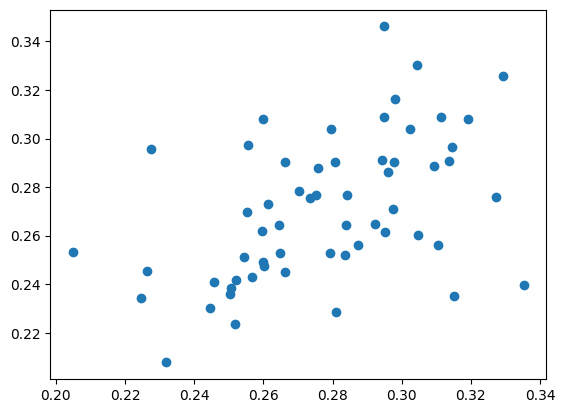

RMSE:  0.03036305092778838


In [41]:
h1819_mle,h1819_rmse_mle,h1819_error_mle=estimate(h1819['H_x'],h1819['AB_x'],h1819['H_y'],h1819['AB_y'],'mle')

In [ ]:
##lower RMSE indicates better predictive performance

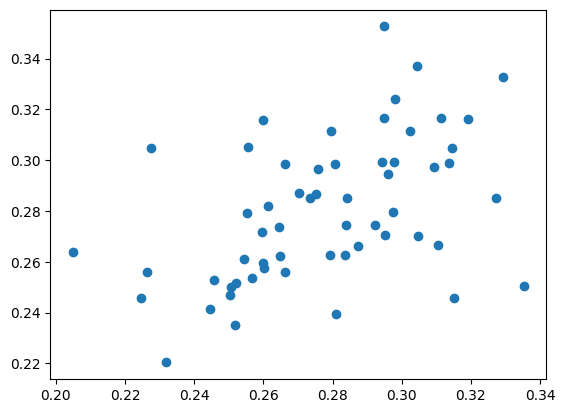

RMSE:  0.029065825984087034


In [39]:
h1819_be,h1819_rmse_be,h1819_error_be=estimate(h1819['H_x'],h1819['AB_x'],h1819['H_y'],h1819['AB_y'],'be')

In [42]:
h1819_error=[h1819_error_mle,h1819_error_be]

{'whiskers': [<matplotlib.lines.Line2D at 0x7e8179a33730>,
 'caps': [<matplotlib.lines.Line2D at 0x7e8179a33d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e8179a33130>,
 'medians': [<matplotlib.lines.Line2D at 0x7e8179d9bbe0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e8179d986d0>,
 'means': []}

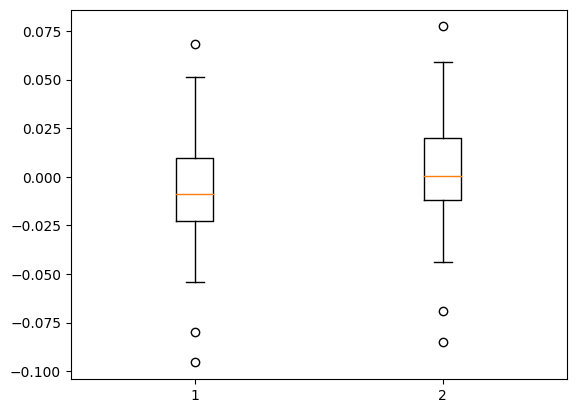

In [43]:
plt.boxplot(h1819_error)